In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [11]:
df= pd.read_csv("IRIS.csv") 

In [12]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [14]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
def summary(df):
    sum = pd.DataFrame(df.dtypes, columns=['dtypes'])
    sum['missing#'] = df.isna().sum().values
    sum['missing%'] = (df.isna().sum().values*100)/len(df)
    sum['uniques'] = df.nunique().values
    sum['count'] = df.count().values
    #sum['skew'] = df.skew().values
    desc = pd.DataFrame(df.describe().T)
    sum['min'] = desc['min']
    sum['max'] = desc['max']
    sum['mean'] = desc['mean']
    return sum

summary(df).style.background_gradient(cmap='twilight_shifted_r')

,dtypes,missing#,missing%,uniques,count,min,max,mean
sepal_length,float64,0,0.000000,35,150,4.300000,7.900000,5.843333
sepal_width,float64,0,0.000000,23,150,2.000000,4.400000,3.054000
petal_length,float64,0,0.000000,43,150,1.000000,6.900000,3.758667
petal_width,float64,0,0.000000,22,150,0.100000,2.500000,1.198667
species,object,0,0.000000,3,150,nan,nan,nan


In [16]:
df.shape

(150, 5)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Data Visuvalization

Text(0.5, 1.0, 'Distribution of Species')

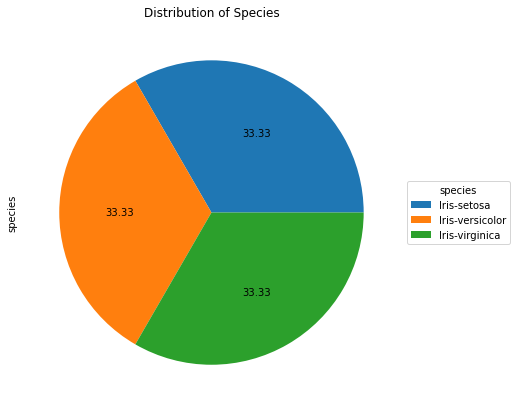

In [21]:
plt.figure(figsize=(10,7))
df["species"].value_counts().plot(kind='pie',autopct='%.2f',labels=None)
plt.legend(df["species"].value_counts().index, title="species", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Distribution of Species")

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-p

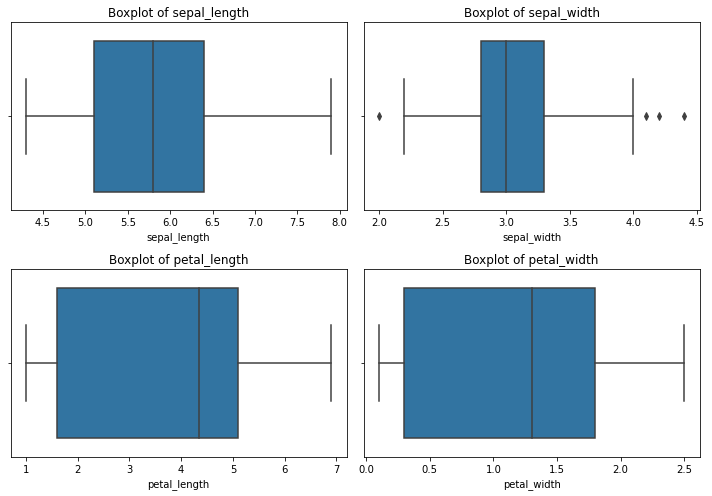

In [24]:
l=['sepal_length','sepal_width','petal_length','petal_width']
plt.figure(figsize=(10,7))
for i in l:
    plt.subplot(2, 2, l.index(i) + 1)   # 2 rows , 2 columns
    sns.boxplot(df[i])
    plt.title(f"Boxplot of {i}")
plt.tight_layout()

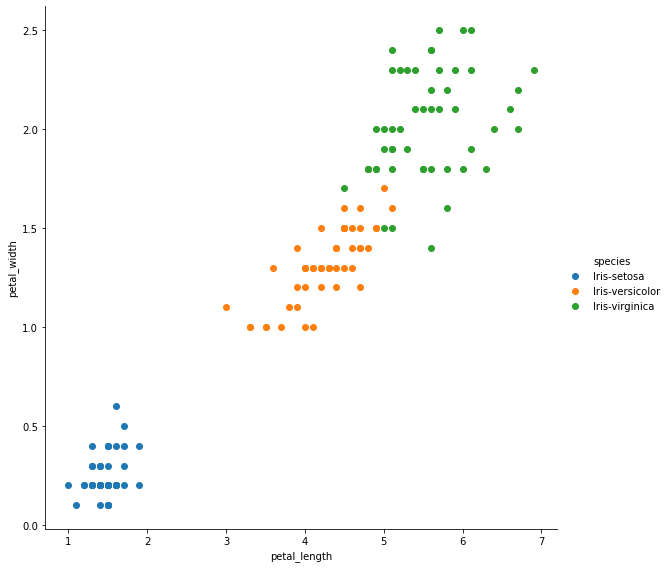

In [31]:
# FaectGrid (to create multiple plots (often of the same type, like scatter plots) arranged in a grid)
sns.FacetGrid(df, hue ="species", height=8, aspect=1).map(plt.scatter, 'petal_length','petal_width').add_legend()

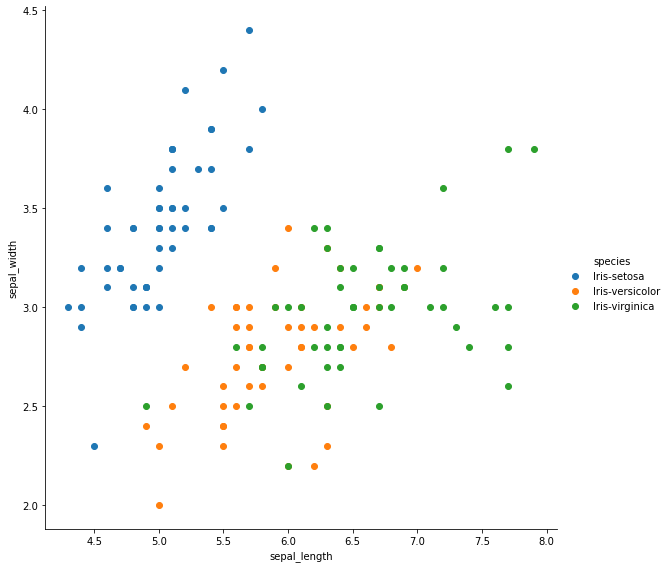

In [32]:
sns.FacetGrid(df, hue ="species", height=8, aspect=1).map(plt.scatter, 'sepal_length','sepal_width').add_legend()

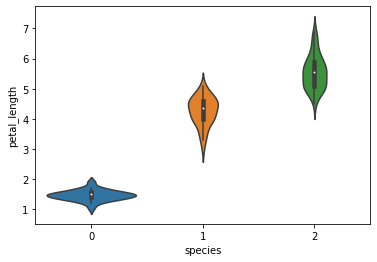

In [53]:
sns.violinplot(x="species",y="petal_length",data=df)
plt.show()

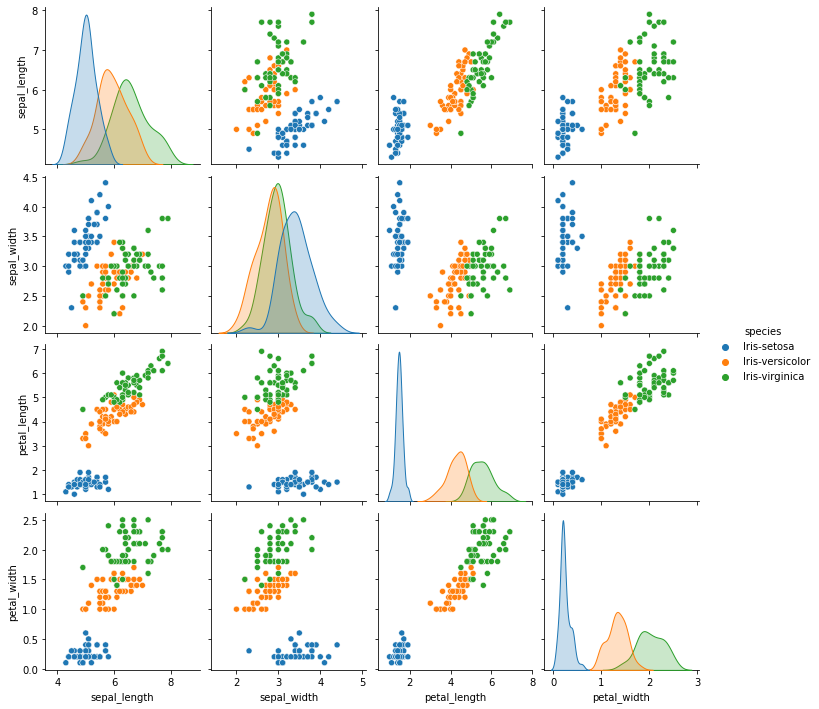

In [33]:
# Pairplot
sns.pairplot(df,hue='species')

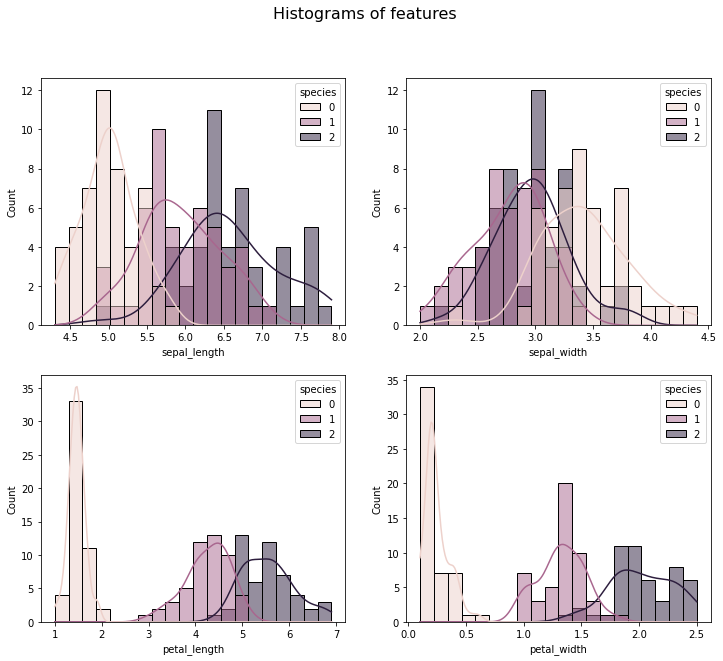

In [54]:
num_columns = list(df.select_dtypes(include=['float']).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,10))
for j in range(num):
    for i in range(num):
        try:
            sns.histplot(data=df,x=num_columns[0],kde=True,bins=20,hue='species',ax=ax[j][i])
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Histograms of features', fontsize=16)
plt.show()

## Encoding

In [34]:
df["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [35]:
# Iris-setosa ---> 0
# Iris-versicolor  -----> 1
# Iris-virginica -------> 2
df["species"]=df["species"].replace({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2})

## Checking Correlation

In [36]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


<AxesSubplot:>

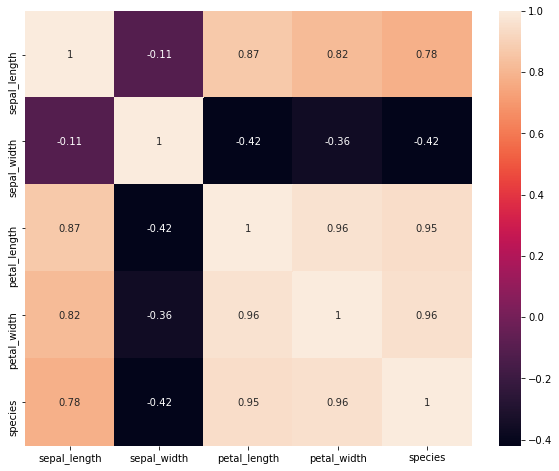

In [39]:
# Using heatmap
plt.figure(figsize=(10, 8))
cor=df.corr()
sns.heatmap(cor,annot=True)

## Train_Test_Split

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [43]:
print(x_train.shape)
print(x_test.shape)

(120, 4)
(30, 4)


## KNN Classifier

In [44]:
model1=KNeighborsClassifier(n_neighbors=3)
model1

KNeighborsClassifier(n_neighbors=3)

In [45]:
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[12  0  0]
 [ 0  9  0]
 [ 0  0  9]]


## Logistic Regression

In [46]:
model2=LogisticRegression(max_iter=1000) # Increase the max_iter value
model2

LogisticRegression(max_iter=1000)

In [47]:
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[12  0  0]
 [ 0  9  0]
 [ 0  0  9]]


## Decision Tree Classifier

In [48]:
model3=DecisionTreeClassifier() # Increase the max_iter value
model3

DecisionTreeClassifier()

In [49]:
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
print(classification_report(y_test, y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.90      1.00      0.95         9
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

[[12  0  0]
 [ 0  9  0]
 [ 0  1  8]]


## Printing Accuracy Scores for each model

In [50]:
print("KNN Classifier Accuracy:", accuracy_score(y_test, y_pred1)*100)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred2)*100)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred3)*100)

KNN Classifier Accuracy: 100.0
Logistic Regression Accuracy: 100.0
Decision Tree Accuracy: 96.66666666666667


## Predicting

In [51]:
# Enter : PetalLengthCm, PetalWidthCm, SepalLengthCm, SepalWidthCm
# Iris-setosa ---> 0
# Iris-versicolor  -----> 1
# Iris-virginica -------> 2
sample_check=[[5.8,2.7,3.9,1.2],
              [7.7,2.8,6.7,2],
              [7.9,3.8,6.4,2],
              [5,3.4,1.5,0.2],
              [4.8,3.4,1.9,0.2]
             ]
for i in sample_check:
    x=model3.predict([i])
    if(x==0):
        print("Iris-setosa")
    elif(x==1):
        print("Iris-versicolor")
    elif(x==2):
        print("Iris-virginica")

Iris-versicolor
Iris-virginica
Iris-virginica
Iris-setosa
Iris-setosa
